In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

### The company I have chosen is The Gap Inc. (GPS)

In [2]:
# Reading The GPS Stock data
data = pd.read_csv("C:/Users/risha/OneDrive/Desktop/BAIS/DSP/GPS.csv")


In [3]:
# Looking at content using .head() command
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/21/2022,14.74,14.83,14.17,14.29,13.410000,6209800
1,4/22/2022,11.55,11.88,11.07,11.72,10.998265,39124400
2,4/25/2022,12.00,12.44,11.70,12.44,11.673925,18223600
3,4/26/2022,12.30,12.57,12.01,12.51,11.739615,10201500
4,4/27/2022,12.56,12.83,12.41,12.51,11.739615,10634000


In [4]:
# Lets look at some of the datatypes
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/21/2022,14.74,14.83,14.17,14.29,13.410000,6209800
1,4/22/2022,11.55,11.88,11.07,11.72,10.998265,39124400
2,4/25/2022,12.00,12.44,11.70,12.44,11.673925,18223600
3,4/26/2022,12.30,12.57,12.01,12.51,11.739615,10201500
4,4/27/2022,12.56,12.83,12.41,12.51,11.739615,10634000
...,...,...,...,...,...,...,...
65,7/26/2022,8.59,8.90,8.54,8.71,8.320633,8053500
66,7/27/2022,8.84,8.96,8.54,8.88,8.483033,5661800
67,7/28/2022,8.96,9.56,8.88,9.56,9.132635,9781200
68,7/29/2022,9.56,9.68,9.31,9.62,9.189953,9927500


In [5]:
# We have to predict the Closing price, so we can drop everything else

data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [6]:
data.head()

,Date,Close
0,4/21/2022,14.29
1,4/22/2022,11.72
2,4/25/2022,12.44
3,4/26/2022,12.51
4,4/27/2022,12.51


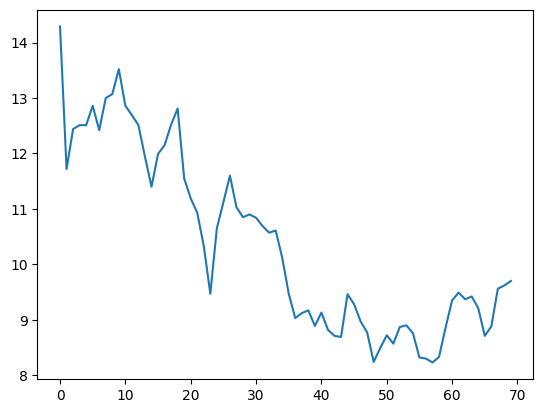

In [7]:
# We do not see any evidence of outliers or missing values, so we are good to go

plt.plot(data['Close'])

## Reshape for standardizing data

In [8]:
# Extract the 'Close' column from the DataFrame
close = np.array(data['Close']).reshape(-1, 1)

close.shape

(70, 1)

## Standardize the values

In [9]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
close_scaled = scaler.fit_transform(close)

## Split the data into Train and Test

### Since, the data is chronological and we have to maintain the order 

In [10]:
# Splitting based on order

split_point = int(len(close_scaled) * 0.7)
train, test = close_scaled[:split_point], close_scaled[split_point:]


### Since we are predicting 10th day price based on past 9 days, I have used 9:1 ratio for train and test


In [11]:
num_cols = 9


X_train = []
y_train = []
for i in range(len(train) - num_cols):
    X_train.append(train[i:i+num_cols])
    y_train.append(train[i+num_cols])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(len(test) - num_cols):
    X_test.append(test[i:i+num_cols])
    y_test.append(test[i+num_cols])

X_test, y_test = np.array(X_test), np.array(y_test)


In [12]:
X_train[1]

array([[0.83977885],
       [1.28376138],
       [1.32692634],
       [1.32692634],
       [1.54275118],
       [1.27142853],
       [1.62908112],
       [1.67224609],
       [1.94973516]])

In [13]:
X_test[1]

array([[-1.01014834],
       [-1.1026447 ],
       [-0.91765198],
       [-0.8991527 ],
       [-0.98548264],
       [-1.25680529],
       [-1.26913814],
       [-1.31230311],
       [-1.25063887]])

In [14]:
y_train[1]

array([1.54275118])

In [15]:
y_test[1]

array([-0.9238184])

## Applying Models

## Simple RNN

In [16]:
rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

rnn_model.compile(loss="mse", optimizer='Adam')

In [18]:
# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 3s 24ms/step - loss: 0.3460
Epoch 2/50
2/2 [==============================] - 0s 0s/step - loss: 0.3043
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2720
Epoch 4/50
2/2 [==============================] - 0s 0s/step - loss: 0.2439
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2308
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2196
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 0.2066
Epoch 8/50
2/2 [==============================] - 0s 904us/step - loss: 0.1968
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1838
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1679
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1595
Epoch 13/50
2/2 [==============================] - 0s 0s/step - loss: 0

## Predictions

In [19]:
#Predict:
y_pred = rnn_model.predict(X_test)

1/1 [==============================] - 0s 476ms/step


In [20]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [21]:
comparison

,actual,predicted
0,8.33,8.344680
1,8.86,8.340562
2,9.35,8.603072
3,9.49,9.027247
4,9.37,9.272355
5,9.42,9.268348
6,9.21,9.260417
7,8.71,9.226039
8,8.88,8.955213
9,9.56,8.817486


In [22]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.1815352900854181

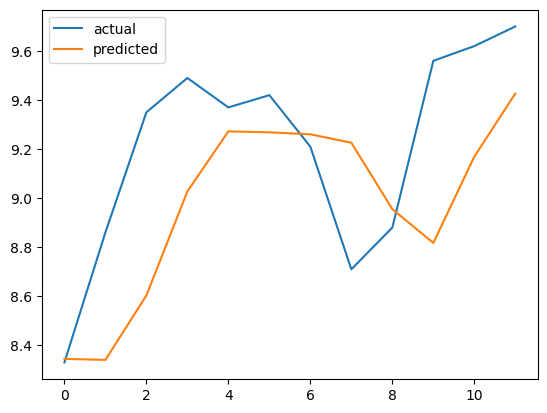

In [23]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with more layers

In [24]:
lstm_model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_model.compile(loss="mse", optimizer='Adam')
# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 8s 18ms/step - loss: 0.7161
Epoch 2/50
2/2 [==============================] - 0s 13ms/step - loss: 0.6218
Epoch 3/50
2/2 [==============================] - 0s 16ms/step - loss: 0.5432
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 0.4699
Epoch 5/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4133
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 0.3626
Epoch 7/50
2/2 [==============================] - 0s 17ms/step - loss: 0.3224
Epoch 8/50
2/2 [==============================] - 0s 19ms/step - loss: 0.2890
Epoch 9/50
2/2 [==============================] - 0s 17ms/step - loss: 0.2718
Epoch 10/50
2/2 [==============================] - 0s 17ms/step - loss: 0.2607
Epoch 11/50
2/2 [==============================] - 0s 19ms/step - loss: 0.2595
Epoch 12/50
2/2 [==============================] - 0s 18ms/step - loss: 0.2543
Epoch 13/50
2/2 [==============================] - 0s 19ms/st

In [26]:
#Predict:
y_pred = lstm_model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [27]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [28]:
comparison

,actual,predicted
0,8.33,8.711422
1,8.86,8.699738
2,9.35,8.689247
3,9.49,8.703090
4,9.37,8.724713
5,9.42,8.755192
6,9.21,8.796352
7,8.71,8.850218
8,8.88,8.888004
9,9.56,8.917963


In [29]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.3040576171517233

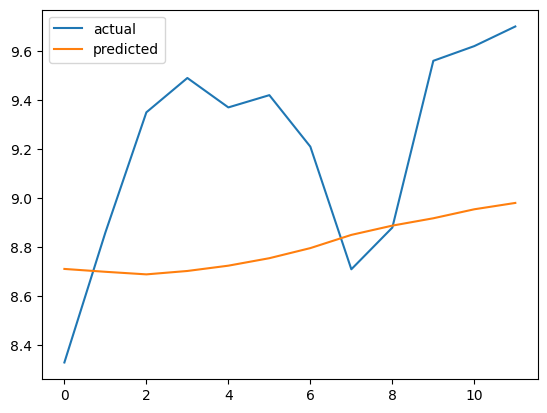

In [30]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU (With more layers)

In [31]:
gru_model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

gru_model.compile(loss="mse", optimizer='Adam')
# Train the model
history = gru_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 7s 17ms/step - loss: 0.6998
Epoch 2/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6547
Epoch 3/50
2/2 [==============================] - 0s 21ms/step - loss: 0.6147
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 0.5760
Epoch 5/50
2/2 [==============================] - 0s 17ms/step - loss: 0.5432
Epoch 6/50
2/2 [==============================] - 0s 18ms/step - loss: 0.5115
Epoch 7/50
2/2 [==============================] - 0s 20ms/step - loss: 0.4803
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4454
Epoch 9/50
2/2 [==============================] - 0s 20ms/step - loss: 0.4156
Epoch 10/50
2/2 [==============================] - 0s 21ms/step - loss: 0.3839
Epoch 11/50
2/2 [==============================] - 0s 20ms/step - loss: 0.3528
Epoch 12/50
2/2 [==============================] - 0s 19ms/step - loss: 0.3238
Epoch 13/50
2/2 [==============================] - 0s 20ms/st

In [33]:
#Predict:
y_pred = gru_model.predict(X_test)

1/1 [==============================] - 1s 828ms/step


In [34]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [35]:
comparison

,actual,predicted
0,8.33,8.418999
1,8.86,8.398647
2,9.35,8.553055
3,9.49,8.836170
4,9.37,9.032113
5,9.42,9.069975
6,9.21,9.097281
7,8.71,9.033966
8,8.88,8.869765
9,9.56,8.811530


In [36]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.2366161600278669

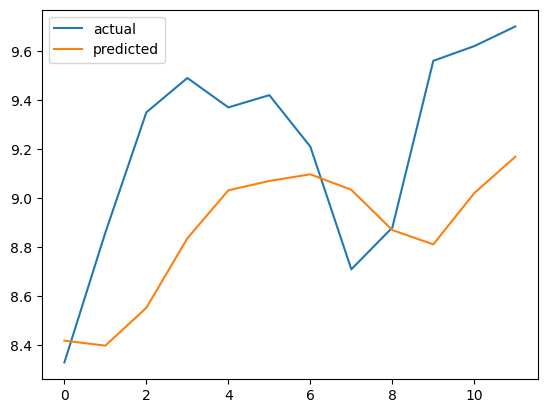

In [37]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Conv1D

In [38]:
conv1d_model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

conv1d_model.compile(loss="mse", optimizer='Adam')

history = conv1d_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 8s 19ms/step - loss: 0.8648
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.8004
Epoch 3/50
2/2 [==============================] - 0s 52ms/step - loss: 0.7517
Epoch 4/50
2/2 [==============================] - 0s 17ms/step - loss: 0.7115
Epoch 5/50
2/2 [==============================] - 0s 52ms/step - loss: 0.6785
Epoch 6/50
2/2 [==============================] - 0s 39ms/step - loss: 0.6466
Epoch 7/50
2/2 [==============================] - 0s 61ms/step - loss: 0.6151
Epoch 8/50
2/2 [==============================] - 0s 57ms/step - loss: 0.5782
Epoch 9/50
2/2 [==============================] - 0s 50ms/step - loss: 0.5456
Epoch 10/50
2/2 [==============================] - 0s 49ms/step - loss: 0.5107
Epoch 11/50
2/2 [==============================] - 0s 56ms/step - loss: 0.4737
Epoch 12/50
2/2 [==============================] - 0s 29ms/step - loss: 0.4346
Epoch 13/50
2/2 [==============================] - 0s 25ms/st

In [40]:
#Predict:
y_pred = conv1d_model.predict(X_test)

1/1 [==============================] - 1s 947ms/step


In [41]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [42]:
comparison

,actual,predicted
0,8.33,8.432426
1,8.86,8.393379
2,9.35,8.499490
3,9.49,8.751368
4,9.37,8.964028
5,9.42,9.041574
6,9.21,9.070898
7,8.71,9.054715
8,8.88,8.944307
9,9.56,8.852562


In [43]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.2655173235229659

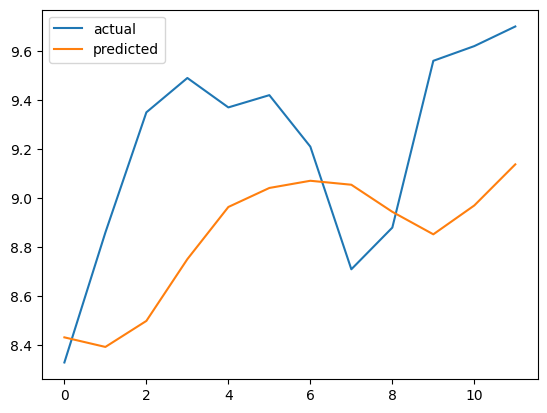

In [44]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### The aim was to predict the 10th day closing price of the GAP Inc. stock based on the past 9 days closing price. I applied Simple RNN, LSTM, GRU, Conv1D models. 
### The MSE or  Mean Squared Error value of each model is as shown below: 
### Simple RNN : 0.1815 
### LSTM            : 0.3040
### GRU              : 0.2366
### Conv1D        : 0.2655


### As we can see from the above results, **Simple RNN** has the lowest MSE value and thus **Simple RNN** performed the best in predicting the closing stock price. GRU has the second best  MSE value followed by Conv1D.